## Homework 01 - Cars braking distance
Investigate the relationship between speed and stopping distance using the classic `cars` dataset.

1. Load the dataset (available via `statsmodels` or the shared GitHub URL) and inspect the first few rows.
2. Plot histograms and density curves for `speed` and `dist`, plus the scatter plot.
3. Fit simple linear regression models manually, both with and without an intercept (derive $\hat{\beta}_0$, $\hat{\beta}_1$).
4. Compute the residual sum of squares and the error variance estimate for each model.
5. Derive the variances (and standard errors) of the estimated parameters in both models.
6. Plot the data together with both fitted regression lines on the same axes.
7. Compare the two slopes ? why do they differ? Which model makes more sense for this context?
8. Predict stopping distances at 20 mph and 30 mph using both models; discuss whether those predictions are plausible.
9. Calculate and plot the residuals for both models. Which residual pattern looks healthier?
10. Introduce an artificial outlier (e.g., high distance at low speed) and refit both models. How do the coefficients change?
11. Reflect on whether a straight-line model is an adequate description. Suggest at least two possible next steps (transformations, additional variables, etc.).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

1. Load the dataset (available via statsmodels or the shared GitHub URL) and inspect the first few rows.

In [ ]:
# Loading the cars dataset from statsmodels
dataset_cars = sm.datasets.get_rdataset('cars', package='datasets')
cars_df = dataset_cars.data

# Displaying the first few rows of the dataset
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


2. Plot histograms and density curves for speed and dist, plus the scatter plot.

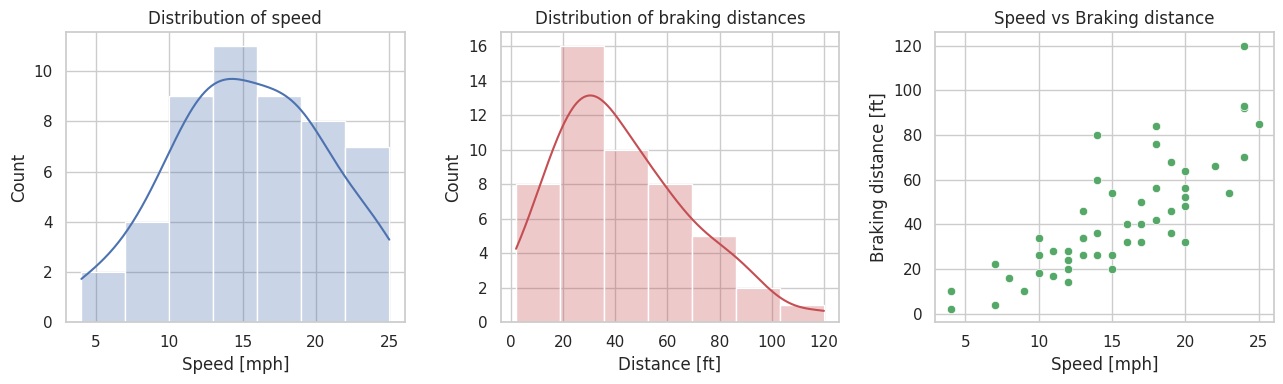

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Plotting a histogram and density curve of speed
sns.histplot(data=cars_df, x='speed', kde=True, alpha=0.3, ax=axes[0], color='#4c72b0', bins=7)
axes[0].set_title('Distribution of speed')
axes[0].set_xlabel('Speed [mph]')

# Plotting a histogram and density curve of braking distances
sns.histplot(data=cars_df, x='dist', kde=True, alpha=0.3, ax=axes[1], color='#c44e52', bins=7)
axes[1].set_title('Distribution of braking distances')
axes[1].set_xlabel('Distance [ft]')

# Scatterplot of speed and braking distance
sns.scatterplot(data=cars_df, x='speed', y='dist', color='#55a868')
axes[2].set_title('Speed vs Braking distance')
axes[2].set_xlabel('Speed [mph]')
axes[2].set_ylabel('Braking distance [ft]')

sns.set_theme(style='whitegrid', palette='deep')

plt.tight_layout()

3. Fit simple linear regression models manually, both with and without an intercept (derive  β^0 ,  β^1 ).

In [ ]:
# Model with intercept
Y = cars_df['dist'].to_numpy()
X = cars_df['speed'].to_numpy()

x_mean = X.mean()
y_mean = Y.mean()

S_xy = ((X - x_mean) * (Y - y_mean)).sum()
S_xx = ((X - x_mean) ** 2).sum()

beta1_hat = S_xy / S_xx
beta0_hat = y_mean - beta1_hat * x_mean

print("Model with intercept")
print(f"Beta1 estimate: {beta1_hat:.4f}")
print(f"Beta0 estimate: {beta0_hat:.4f}")

Model with intercept
Beta1 estimate: 3.9324
Beta0 estimate: -17.5791


In [ ]:
# Model without intercept
slope = (X*Y).sum()/(X**2).sum()

print("Model without intercept")
print(f"Slope estimate: {slope:.4f}")

Model without intercept
Slope estimate: 2.9091


4. Compute the residual sum of squares and the error variance estimate for each model.

In [ ]:
# Residual sums of squares (SSE)
y_hat = beta0_hat + beta1_hat * X
SSE = ((Y - y_hat)**2).sum()
print(f"Residual sum of squares for model with intercept SSE = {SSE:.4f}")
SSE_without = ((Y - (slope * X))**2).sum()
print(f"Residual sum of squares for model without intercept SSE = {SSE_without:.4f}")

# Error variances
err_var = SSE/(len(cars_df)-2)
print(f"Error variance for model with intercept: {err_var:.4f}")
err_var_without = SSE_without/(len(cars_df)-1)
print(f"Error variance for model without intercept: {err_var_without:.4f}")

Residual sum of squares for model with intercept SSE = 11353.5211
Residual sum of squares for model without intercept SSE = 12953.7768
Error variance for model with intercept: 236.5317
Error variance for model without intercept: 264.3628


5. Derive the variances (and standard errors) of the estimated parameters in both models.

In [ ]:
# Variances of estimated parameters
beta0_var = err_var*(1/len(X)+(X.mean())**2/S_xx)
beta1_var = err_var/S_xx
slope_var = err_var_without/(X**2).sum()
print(f"Variance of beta0: {beta0_var:.4f} and standard error: {np.sqrt(beta0_var):.4f}")
print(f"Variance of beta1: {beta1_var:.4f} and standard error: {np.sqrt(beta1_var):.4f}")
print(f"Variance of slope: {slope_var:.4f} and standard error: {np.sqrt(slope_var):.4f}")

Variance of beta0: 45.6765 and standard error: 6.7584
Variance of beta1: 0.1727 and standard error: 0.4155
Variance of slope: 0.0200 and standard error: 0.1414


6. Plot the data together with both fitted regression lines on the same axes.

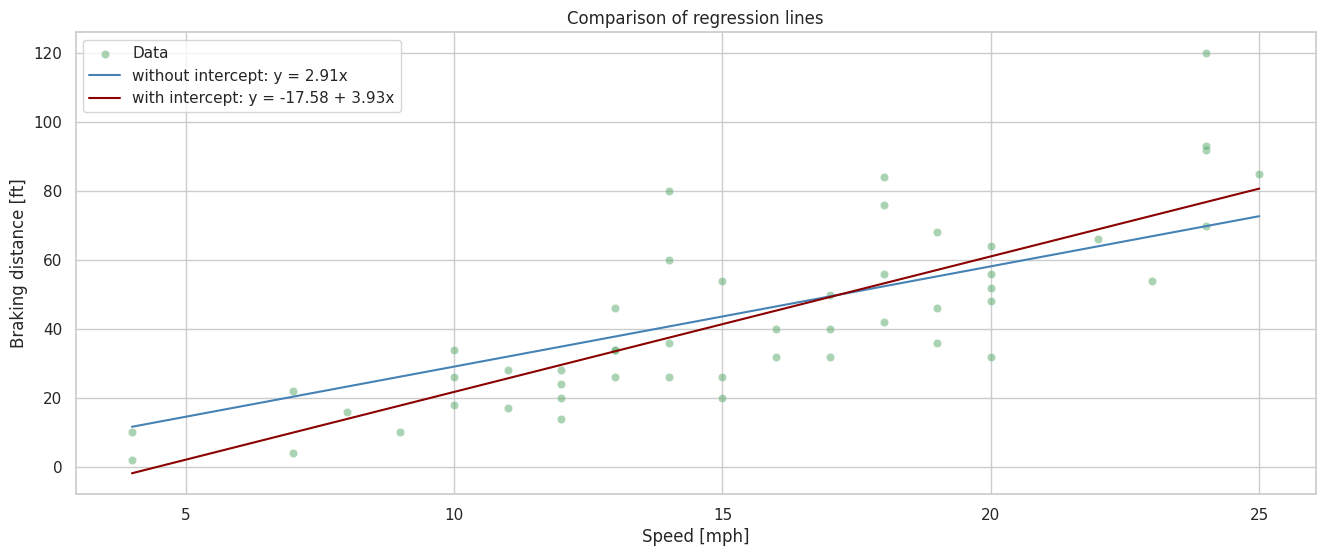

In [ ]:
plt.figure(figsize=(16, 6))

# Scatterplot of data
sns.scatterplot(x=X, y=Y, alpha=0.5, color='#55a868', label='Data')

# Plotting a regression line without intercept
plt.plot(X, X * slope, color='steelblue', label=f'without intercept: y = {slope:.2f}x')

# Plotting a regression line with intercept
plt.plot(X, beta0_hat + beta1_hat * X, color='darkred', label=f'with intercept: y = {beta0_hat:.2f} + {beta1_hat:.2f}x')

plt.xlabel('Speed [mph]')
plt.ylabel('Braking distance [ft]')
plt.title('Comparison of regression lines')
plt.legend()
plt.show()

7. Compare the two slopes. Why do they differ? Which model makes more sense for this context?

The slope in the model with intercept is bigger. Formulas for their calculation differ which implies different results for types of regression used. Model without intercept is maybe more appropriate in this case because we expect no braking distance at zero speed. However, model with intercept might explain data better within measured range of speed.

8. Predict stopping distances at 20 mph and 30 mph using both models; discuss whether those predictions are plausible

In [ ]:
# Computation of stopping distance for model with intercept

def stop_dist(velocity):
  return beta0_hat + beta1_hat * velocity
print('Model with intercept')
print('Estimated stopping distance at 20 mph is ' f'{stop_dist(20):.2f}' ' ft.')
print('Estimated stopping distance at 30 mph is ' f'{stop_dist(30):.2f}' ' ft.')

# Computation of stopping distance for model without intercept

def stop_dist_without(velocity):
  return slope * velocity
print('---------------------------------')
print('Model without intercept')
print('Estimated stopping distance at 20 mph is ' f'{stop_dist_without(20):.2f}' ' ft.')
print('Estimated stopping distance at 30 mph is ' f'{stop_dist_without(30):.2f}' ' ft.')

Model with intercept
Estimated stopping distance at 20 mph is 61.07 ft.
Estimated stopping distance at 30 mph is 100.39 ft.
---------------------------------
Model without intercept
Estimated stopping distance at 20 mph is 58.18 ft.
Estimated stopping distance at 30 mph is 87.27 ft.


Predictions of stopping distances at 20 mph are comparable for both models but predictions at 30 mph differ quite a lot. While calculated braking distances at 20 mph are both plausible, stopping distance at 30 mph predicted by model without intercept might be underestimated.

9. Calculate and plot the residuals for both models. Which residual pattern looks healthier?

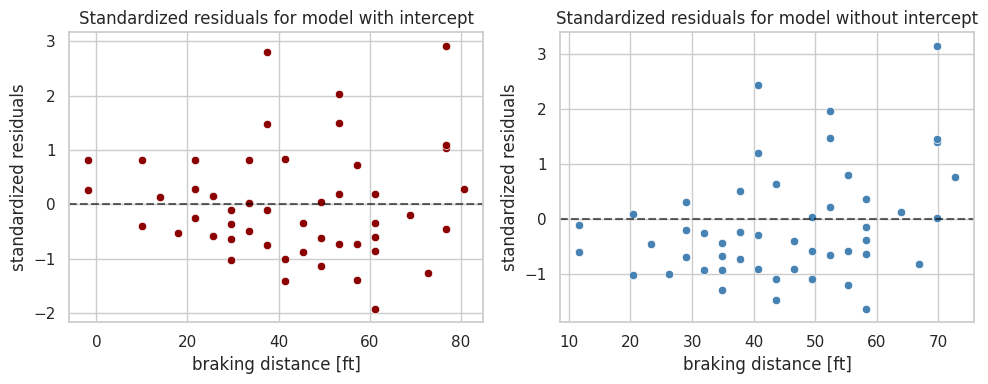

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Calculation of residuals
residuals = Y - y_hat
residuals_without = Y - (slope * X)
standardized_residuals = residuals / np.sqrt(err_var * (1 - (1/len(cars_df) + (X - x_mean) ** 2 / S_xx)))
standardized_residuals_without = residuals_without / np.sqrt(err_var_without * (1 - (X ** 2/ (X**2).sum())))

# Scatterplot of residuals vs regression predictions
sns.scatterplot(data=cars_df, x=y_hat, y=standardized_residuals, ax = axes[0], color='darkred')
axes[0].set_title('Standardized residuals for model with intercept')
axes[0].set_xlabel('braking distance [ft]')
axes[0].set_ylabel('standardized residuals')
axes[0].axhline(y=0, color="black", linestyle="--", alpha=0.6)

# Scatterplot of residuals vs regression predictions
sns.scatterplot(data=cars_df, x=slope * X, y=standardized_residuals_without, ax = axes[1], color='steelblue')
axes[1].set_title('Standardized residuals for model without intercept')
axes[1].set_xlabel('braking distance [ft]')
axes[1].set_ylabel('standardized residuals')
axes[1].axhline(y=0, color="black", linestyle='--', alpha=0.6)

plt.tight_layout()

Residual pattern of model with intercept looks healthier because residuals are more randomly distributed. However, it seems that variance is slightly increasing with larger braking distances.

10. Introduce an artificial outlier (e.g., high distance at low speed) and refit both models. How do the coefficients change?

In [ ]:
cars_df_outlier = cars_df.copy()
#outlier = pd.DataFrame({'speed': [5], 'dist': [120]})
#cars_df_outlier = pd.concat([cars_df_outlier, outlier], ignore_index=True)
outlier2 = pd.DataFrame({'speed': [25], 'dist': [1]})
cars_df_outlier = pd.concat([cars_df_outlier, outlier2], ignore_index=True)

# Model with intercept
Y = cars_df_outlier['dist'].to_numpy()
X = cars_df_outlier['speed'].to_numpy()

x_mean = X.mean()
y_mean = Y.mean()

S_xy = ((X - x_mean) * (Y - y_mean)).sum()
S_xx = ((X - x_mean) ** 2).sum()

beta1_hat_out = S_xy / S_xx
beta0_hat_out = y_mean - beta1_hat_out * x_mean

print("Model with intercept for data with an outlier")
print(f"Beta1 estimate: {beta1_hat_out:.4f}")
print(f"Beta0 estimate: {beta0_hat_out:.4f}")

# Model without intercept

slope_out = (X*Y).sum()/((X**2).sum())

print('-----------------------------------------')
print("Model without intercept for data with outlier")
print(f"Slope estimate: {slope_out:.4f}")

Model with intercept for data with an outlier
Beta1 estimate: 3.4186
Beta0 estimate: -11.1323
-----------------------------------------
Model without intercept for data with outlier
Slope estimate: 2.7797


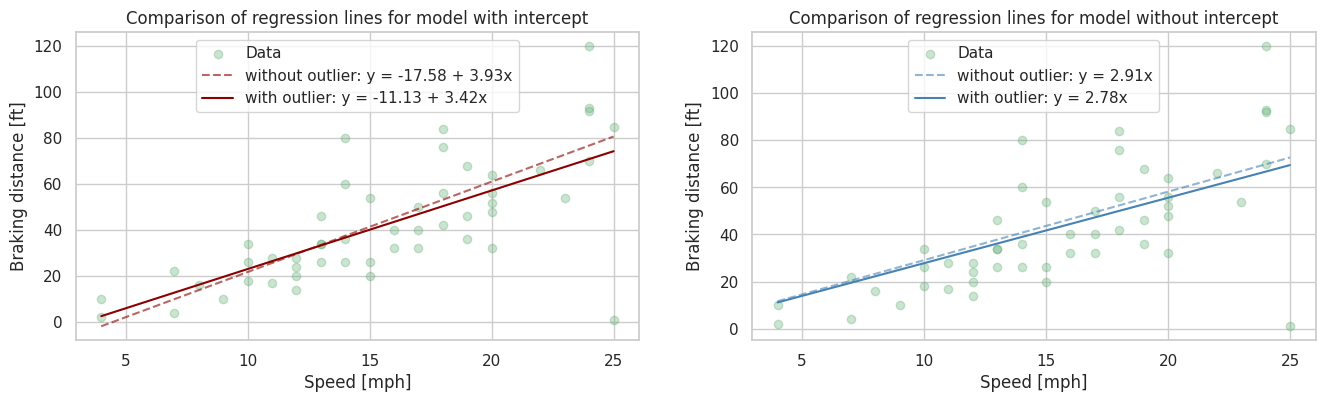

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Plotting regression lines with intercept
axes[0].scatter(x=X, y=Y, alpha=0.3, color='#55a868', label='Data')
axes[0].plot(X, beta0_hat + beta1_hat * X, color='darkred', alpha=0.6, linestyle='--', label=f'without outlier: y = {beta0_hat:.2f} + {beta1_hat:.2f}x')
axes[0].plot(X, beta0_hat_out + beta1_hat_out * X, color='darkred', label=f'with outlier: y = {beta0_hat_out:.2f} + {beta1_hat_out:.2f}x')
axes[0].set_xlabel('Speed [mph]')
axes[0].set_ylabel('Braking distance [ft]')
axes[0].set_title('Comparison of regression lines for model with intercept')
axes[0].legend(loc='upper center')

# Plotting regression lines without intercept
axes[1].scatter(x=X, y=Y, alpha=0.3, color='#55a868', label='Data')
axes[1].plot(X, X * slope, color='steelblue', alpha=0.6, linestyle='--', label=f'without outlier: y = {slope:.2f}x')
axes[1].plot(X, X * slope_out, color='steelblue', label=f'with outlier: y = {slope_out:.2f}x')
axes[1].set_xlabel('Speed [mph]')
axes[1].set_ylabel('Braking distance [ft]')
axes[1].set_title('Comparison of regression lines for model without intercept')
axes[1].legend(loc='upper center')

plt.show()

As it can be seen, linear model without intercept is more robust to outliers so the slope doesn't change dramatically. Addition of an outlier to the model with intercept change both parameters significantly. However, it also depends on the exact position of an outlier because linear model without an intercept is forced to crossed the origin so an outlier [5; 120] doesn't change parameters as much as an outlier [25; 1].